In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=a1cad885fa799f08f973f47b9b961913832e1e5984568603184e3d461c7ce44c
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s45f3t2g0.01py1-y1+y2-y1+y3.csv to 500s45f3t2g0.01py1-y1+y2-y1+y3.csv


In [3]:
df = pd.read_csv("500s45f3t2g0.01py1-y1+y2-y1+y3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
#    'Y4',
#    'Y5',
#    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
0,0.366191,0.502483,0.207276,0.737311,0.885464,0.366297,0.317030,0.479499,0.326556,0.419052,...,0.680276,0.307064,0.455984,0.772031,0.821302,0.200766,0.720493,0.731916,0.408709,0.913201
1,0.317195,0.039226,0.214294,0.374901,0.011768,0.444546,0.602973,0.418372,0.569188,0.760255,...,0.608618,0.300489,0.298983,0.406407,0.463589,0.752707,0.556350,0.019023,0.892393,0.750883
2,0.280276,0.948750,0.110112,0.237099,0.966884,0.503393,0.393113,0.183178,0.811420,0.702586,...,0.688283,0.573801,0.850816,0.515897,0.813586,0.809649,0.942388,0.081978,0.559589,0.733380
3,0.405950,0.714083,0.077130,0.844878,0.901905,0.047533,0.304650,0.450250,0.590573,0.340276,...,0.126405,0.568610,0.579736,0.187743,0.495483,0.476045,0.303655,0.151289,0.612328,0.098755
4,0.484757,0.795682,0.578759,0.501168,0.707559,0.718689,0.405521,0.740677,0.672134,0.446990,...,0.026860,0.505377,0.073395,0.089531,0.669078,0.614166,0.410588,0.679075,0.744970,0.769416


In [4]:
y.head()

,Y1,Y2,Y3
0,0.730322,0.493067,0.245295
1,0.499714,0.355735,0.413773
2,0.474030,0.576913,0.427368
3,0.732604,0.130840,0.508548
4,0.694111,0.935402,0.602670


In [5]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(RandomForestRegressor(  max_samples=200,  max_features="auto", max_leaf_nodes=100,random_state=39, min_samples_leaf=9, n_estimators=100,criterion='squared_error'))
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=39))
rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

0.3217185700659689

In [6]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.12028719566524845
MAE for morrfr is 0.09022805202793975


In [7]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)
tpotreg.score(X_test, y_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.015027296582932854

Generation 2 - Current best internal CV score: -0.014990541888837677

Generation 3 - Current best internal CV score: -0.014816576067078004

Generation 4 - Current best internal CV score: -0.014816576067078004

Generation 5 - Current best internal CV score: -0.01472252480387774

Best pipeline: ElasticNetCV(LinearSVR(ElasticNetCV(input_matrix, l1_ratio=0.45, tol=1e-05), C=0.5, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.1), l1_ratio=0.65, tol=0.01)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008765597225609892

Generation 2 - Current best internal CV score: -0.008761754821510023

Generation 3 - Current best internal CV score: -0.008761754821510023

Generation 4 - Current best internal CV score: -0.008761529464206072

Generation 5 - Current best internal CV score: -0.008753429131418475

Best pipeline: ElasticNetCV(CombineDFs(input_matrix, SGDRegressor(input_matrix, alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate=invscaling, loss=huber, penalty=elasticnet, power_t=0.5)), l1_ratio=0.05, tol=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00925502660028369

Generation 2 - Current best internal CV score: -0.009235654495963714

Generation 3 - Current best internal CV score: -0.009234706146882595

Generation 4 - Current best internal CV score: -0.009226032603352563

Generation 5 - Current best internal CV score: -0.009226032603352563

Best pipeline: ElasticNetCV(SelectPercentile(input_matrix, percentile=72), l1_ratio=0.65, tol=0.01)
RMSE for TPOT-MO is 0.12028719566524845
MAE for TPOT-MO is 0.09022805202793975


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


0.5591004752830885

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
#rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1 = MultiOutputRegressor(LinearSVR(tol=0.0001, C=1.0,loss='squared_epsilon_insensitive',intercept_scaling=1.0,fit_intercept=True,epsilon=0, random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.5315844119096634

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.09643179261912843
MAE for morlsvr is 0.0726869631493684


In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train, y_train)
Ypred2 = clf2.predict(X_test)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.014962719256407426

Generation 2 - Current best internal CV score: -0.01494505342574679

Generation 3 - Current best internal CV score: -0.01494505342574679

Generation 4 - Current best internal CV score: -0.01494505342574679

Generation 5 - Current best internal CV score: -0.01494505342574679

Best pipeline: ElasticNetCV(ElasticNetCV(input_matrix, l1_ratio=0.05, tol=0.01), l1_ratio=0.65, tol=0.001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.007292295162078253

Generation 2 - Current best internal CV score: -0.007292295162078253

Generation 3 - Current best internal CV score: -0.007288789077376392

Generation 4 - Current best internal CV score: -0.007288304279846931

Generation 5 - Current best internal CV score: -0.007283107431877113

Best pipeline: ElasticNetCV(SelectFromModel(LassoLarsCV(input_matrix, normalize=False), max_features=0.6000000000000001, n_estimators=100, threshold=0.5), l1_ratio=0.05, tol=0.1)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.008992894241294683

Generation 2 - Current best internal CV score: -0.008992894241294683

Generation 3 - Current best internal CV score: -0.008992894241294683

Generation 4 - Current best internal CV score: -0.00898828671904291

Generation 5 - Current best internal CV score: -0.008969480612698985

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=True), normalize=True)


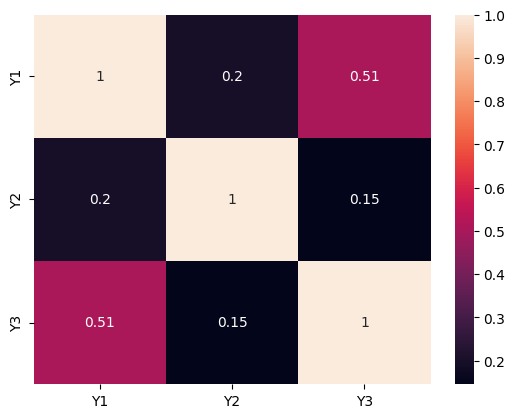

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()

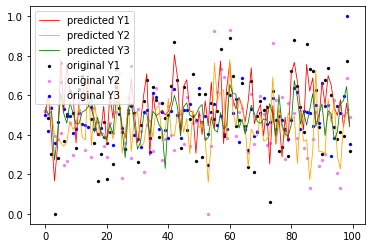

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
#plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
#plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
#plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.114299
Y2    0.080532
Y3    0.082898
dtype: float64
arrmse:  0.0925761890625925
Mean absolute error :  0.06995965904975114
R2:  0.5624817991122933
RMSE for Ypred2 is 0.09384682566064959
